![](imagenes/UC_FMRI.jpg)

---

---

***Andres Eduardo Aracena Rangel***

*Estudiante del programa del Magister en Física Médica*

---

---

El siguiente Script de Python forma parte del trabajo especial de grado.

Profesora Guía:

*PhD María Daniela Cornejo*

---

---

Imagenes de fMRI extraidas de OpenNeuro:

- [ds001454](https://openneuro.org/datasets/ds001454/versions/1.3.1)
- [ds002422](https://openneuro.org/datasets/ds002422/versions/1.1.0)
- [ds004101](https://openneuro.org/datasets/ds004101/versions/1.0.1)

---

---

Con referencia:

- [Pagina oficial NIbabel](https://nipy.org/nibabel/index.html) 

Orientaciones:

- Neu, Scott and Crawford, Karen and Toga, Arthur.Practical management of heterogeneous neuroimaging metadata by global neuroimaging data repositories.Frontiers in Neuroinformatics.6.2012.   https://www.frontiersin.org/articles/10.3389/fninf.2012.00008/full

- Poldrack, R. A., Mumford, J. A., and Nichols, T. E. (2011). Handbook of functional MRI data analysis. Cambridge University Press.

- https://nipy.org/nibabel/coordinate_systems.html
- https://nipy.org/nibabel/neuro_radio_conventions.html

---

---

Acronimos:
- RM: Resonancia Magnética
- IMR: Imágen de Resoanncia Magnetica
- IMRf: Imágen de Resoanncia Magnetica funcional
- DF: DataFrame

---

---

Imagenes realizadas por el autor del script, con apoyo de imagenes 3D de sujetos (radiológo/neurológo y físico/ingeniero) del programa Microsoft PowerPoint y sujeto en estudio (rojo) de la pagina web https://free3d.com/es/modelo-3d/mascular-male-base-mesh-99526.html

---

---

# Orientación, sistemas de coordenadas, cortes slices y función 'visual_cortes_ana'

## Importamos librerias


In [1]:
import time # medir el tiempo de ejecución de nuestros programas
start = time.process_time()
inicio = time.time()

In [2]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)

import nibabel as nib # Acceso de letcura/escritura y visualización de algunos formatos comunes de neuroimagen

## Definimos Parametros 

In [3]:
'''
Ruta del directorio de la data
'''
path_data = '/home/aracena/data/'

'''
Ruta donde reposa las imágenes anatómicas
'''
# Estudio ds001454
path_ds001454 = opj(path_data,'ds001454','sub-01','ses-1')
path_ana_ds001454 = opj(path_ds001454, 'anat','sub-01_ses-1_T1w.nii.gz')
#sub-01_ses-1_T1w.json

# Estudio ds002422
path_ds002422 = opj(path_data,'ds002422','sub-01')
path_ana_ds002422 = opj(path_ds002422, 'anat', 'sub-01_T1w.nii')
#T1w.json

# Estudio ds004101
path_ds004101 = opj(path_data,'ds004101','sub-09114','ses-1pre')
path_ana_ds004101 = opj(path_ds004101,'anat', 'sub-09114_ses-1pre_T1w.nii.gz')
#T1w.json

'''
Ruta donde reposa las imágenes fisiológicas
'''
# Estudio ds001454
path_fis_ds001454 = opj(path_ds001454, 'func','sub-01_ses-1_task-rest_run-01_bold.nii.gz')

# Estudio ds002422
path_fis_ds002422 = opj(path_ds002422, 'func', 'sub-01_task-rest_bold.nii.gz')

# Estudio ds004101
path_fis_ds004101 = opj(path_ds004101, 'func', 'sub-09114_ses-1pre_task-rest_bold.nii.gz')



'''
Ruta donde se guardaran los resultados
'''
path_expe = '/home/aracena/thesis_ds002422/00_fase0_tips_nibabel_funciones/'

path_output = opj(path_expe,'00_02_orientacion_cortes_nibabel_and_func_visualcortes', 'output')
path_png = opj(path_output,'archivos_png')

# Crear la(s) carpeta(s) de salida
os.system('mkdir -p %s'%path_output)
os.system('mkdir -p %s'%path_png);


'''
Ruta donde se reposan las imagenes de referencia de cortes anatómicos
'''
path_ref = opj(path_expe, '00_02_orientacion_cortes_nibabel_and_func_visualcortes', 'imagenes')

## Cargamos imagenes anatomica y fisiologica

In [4]:
# Anatomica
img_ana = nib.load(path_ana_ds002422) # Cargamos la imagen y creamos un objeto imagen_anatomica

# Fisiologica
img_fis = nib.load(path_fis_ds002422) # Cargamos la imagen y creamos un objeto imagen_fisiologica

## Cargar datos de la imagen

In [5]:
# Anatomica
datos_img_ana = img_ana.get_fdata()

# Fisiologica
datos_img_fis = img_fis.get_fdata()

In [6]:
# Anatómica
form_ana = img_ana.shape # Atributo --> Forma Matriz

# Fisiológica
form_fis = img_fis.shape # Atributo --> Forma Matriz

print('\n----------------------------\n')
print('Forma de la matriz_fis:', '\n', form_ana, '---->', '3D')
print('\n----------------------------\n')
print('Forma de la matriz_fis:', '\n', form_fis, '---->', '4D')
print('\n----------------------------\n')


----------------------------

Forma de la matriz_fis: 
 (256, 256, 176) ----> 3D

----------------------------

Forma de la matriz_fis: 
 (64, 64, 36, 200) ----> 4D

----------------------------



## Orientación de la imagen

In [7]:
# Anatómica
ori_ana = nib.orientations.aff2axcodes(img_ana.affine)

#Fisiológica
ori_fis = nib.orientations.aff2axcodes(img_fis.affine)

print('\n--------------------------------------\n')
print('Orientación de la imagen anatómica:\n', ori_ana)
print('\n--------------------------------------\n')
print('Orientación de la imagen fisiológica:\n', ori_fis)
print('\n--------------------------------------\n')


--------------------------------------

Orientación de la imagen anatómica:
 ('P', 'S', 'R')

--------------------------------------

Orientación de la imagen fisiológica:
 ('L', 'A', 'S')

--------------------------------------



Para comprender/entender que significa las orientaciones de las imagenes, debemos conocer los diferentes sistemas de coordenadas al tratar con imágenes y aplicaciones médicas. Hay tres sistemas de coordenadas comúnmente utilizados en aplicaciones de imágenes y cada sistema de coordenadas tiene un propósito y representa sus datos de diferentes maneras. Contamos con tres sistemas de referencia:

- Sistema de coordenadas mundial (Escaner)
- Sistema de coordenadas anatómico (Convención Radiológica/Neurológica)
- Sistema de coordenadas voxels (Imagen)

La siguiente figura ilustra los tres espacios y sus correspondientes ejes.

![](imagenes/sistemas_coordenadas.png)

### Sistema de coordenadas mundial (escáner XYZ)

Cuando se hace referencia al sistema de coordenadas mundial en IRM, se hace referencia al sistema de coordenadas del escáner de RM. Este sistema está conformado por tres ejes ortogonales, cuyo origen de los ejes está en el isocentro del imán; esta es la coordenada (0, 0, 0) en nuestro espacio de referencia. Las unidades para los tres ejes son milímetros. Para definir la dirección de los ejes, imaginemos un observador parado detrás del escáner mirando a través del orificio del imán hacia el final de la cama del escáner, como se observa en la figura.

![](imagenes/sistemas_coordenadas_equipo.png)

Dibuje una línea que viaja hacia el observador a través del centro del orificio del imán, paralela al piso/cama, con el punto cero en el isocentro del imán y los valores positivos más cerca del observador. Llame a esta línea el eje del orificio del escáner (eje z).

Dibuje una línea que viaja desde el piso de la sala del escáner a través del isocentro del imán hacia el techo, en ángulo recto con el eje del orificio del escáner. El punto cero en el isocentro del imán y los valores positivos están hacia el techo. Llame a esta línea el eje escáner-suelo/techo (eje y).

Dibuja una línea en ángulo recto con las otras dos líneas, paralela al piso, viajando desde la izquierda del observador y a través del isocentro del imán hacia la derecha del observador. El punto cero en el isocentro del imán y los valores positivos están a la derecha. Llame a esta línea escáner-izquierda/derecha (eje x).

Este sistema de referencia a veces se conoce como "escáner XYZ". 

Una coordenada de (x,y,z)=(-20,10,−30) en el sistema mundial, nos indica que el punto se encuentra a 20 mm a la izquierda (del observador ficticio) del isocentro, a 10 mm hacia el techo y a 30 mm hacia el pie de la cama del escáner.

### Sistema de coordenadas anatómico (Convención Radiológica/Neurológica)

El sistema de coordenadas anatómico consta de tres planos para describir la posición anatómica estándar de un ser humano:

- Plano sagital: separa la izquierda (Left) de la derecha (Right),
- Plano axial: separa la cabeza (Superior) de los pies (Inferior),
- Plano coronal: separa el frente de (Anterior) la espalda (Posterior).

![](imagenes/planos_anatomicos.png)

En la figura podemos observar como el sujeto se encuentra en la camilla en posición decúbito supino (posición corporal acostado boca arriba en un plano paralelo al suelo), donde el eje escáner izquierda/derecha coincide con el eje izquierda/derecha del sujeto, el eje escáner suelo/techo es el eje posterior/anterior, y el eje del orificio del escáner es el eje inferior/superior del sujeto; podríamos concluir que al menos los ejes del escáner coinciden con los ejes anatómicos. Pero, si el sujeto se encuentra en camilla en posición decúbito prono (posición corporal acostado boca abajo en un plano paralelo al suelo), solo coincidiría el eje del orificio del escáner (eje z) con en el eje inferior/superior del sujeto, por lo tanto, el sistema de referencia mundial no informará sobre la izquierda y la derecha del sujeto, sino solo sobre la izquierda y la derecha del escáner. Es por esta razón, de la necesidad de saber dónde estamos en términos de la izquierda y la derecha del sujeto, que se utiliza los sistemas de coordenadas anatómicos centrados en el sujeto. La mayoría de los formatos de archivo utilizan dos convenciones:

- Convención neurológica
- Convención radiológica

En estos sistemas, los ejes siguen siendo los ejes del escáner, pero el orden y la dirección de los ejes provienen de la posición del sujeto.

#### Convención neurológica (RAS)

A los neurólogos les gusta mirar imágenes del cerebro con el lado derecho del paciente a la derecha de la imagen. Esta perspectiva es como si el neurólogo estuviera mirando el corte de la parte superior de la cabeza del paciente (como se ilustra en la figura, nos imaginamos que el punto de vista del neurólogo es como si estuviera posicionado detrás del equipo a el extremo superior de la camilla) y, por lo tanto, apuntan el eje x de izquierda (left) a derecha (Right) del sujeto, el eje y de posterior (posterior) a anterior (Anterior) del sujeto y el eje z de los pies (inferior) a la cabeza (Superior) del sujeto. Este sistema de coordenadas se denomina "RAS" (Right, Anterior y Superior), siendo el más común en neuroimagen y se ilustra en la figura.

![](imagenes/sistemas_coordenadas_neurologico.png)

#### Convención radiológica (LPS)

A los radiólogos les gusta mirar sus imágenes con la izquierda del paciente a la derecha de la imagen. Si están mirando una imagen del cerebro, es como si estuvieran mirando el corte del cerebro desde el punto de vista de los pies del paciente (como se ilustra en la figura, nos imaginamos que el punto de vista del radiólogo es como si estuviera posicionado a los pies del paciente a el extremo inferior de la camilla), y, por lo tanto, apuntan el eje x de derecha (right) a izquierda (Left) del sujeto, el eje y de anterior (anterior) a posterior (Posterior)  del sujeto y el eje z de los pies (inferior) a la cabeza (Superior) del sujeto. Este sistema de coordenadas se denomina "LPS" (Left, Posteior y Superior).

![](imagenes/sistemas_coordenadas_radiologico.png)

Es importante destacar que, DICOM usa la convención radiológica mientras que NIFTI usa la convención neurológica.

La página oficial de Nipype nos muestra imagen de un derrame cerebral en el lóbulo temporal izquierdo (lo que provoca un área oscura en la IRM), donde compara estas convenciones de visualización, mostrando las direcciones en las que están pensando el neurólogo y el radiólogo.

![](imagenes/sistema_coordenadas_radioneuro.png)

#### Otras orientaciones anatómicas usadas

Existen otras configuraciones para orientar el sistema de coordenadas anatómico, por ejemplo, el sistema LAS o PSR, los cuales se orientan siguiendo la regla de la mano izquierda y se ilustran en las siguientes figuras.

![](imagenes/sistemas_coordenadas_LAS.png)

![](imagenes/sistemas_coordenadas_PSR.png)

### Sistema de coordenadas voxels (IJK)

Como se describió en el script de python **00_00_atributos_nibabel_and_func_atributoimg.ipynb**, la imagen nifti esta compuesta por:
    
    - una matriz de N dimensiones que contiene los datos de la imagen,

    - una matriz afín (4, 4) mapeando las coordenadas de la matriz a las coordenadas en algún espacio de coordenadas mundial RAS+,
    
    - metadatos de imagen en forma de encabezado.

Los datos de imágenes digitales sin metadatos descriptivos no tienen sentido, ya que estos contienen requisitos y restricciones particulares que son necesarios para mantener la usabilidad y la interoperabilidad. 

Un archivo de una neuroimagen consta de una línea de bytes consecutivos; una imagen bidimensional primero debe transformarse en una matriz lineal de píxeles de imagen antes de que pueda almacenarse. Como se ilustra en la figura (centro), el método para escribir una imagen 2D en un archivo puede entenderse visualizando los píxeles como cuentas en una hebra de hilo. El hilo comienza en el primer píxel de la esquina superior izquierda de la imagen y pasa a través de los píxeles de la fila superior de la imagen. Vuelve al primer píxel de la siguiente fila repetidamente hasta que llega al último píxel de la última fila.


![](imagenes/sistema_coordenadas_voxel_1.png)

Debido a que el ancho y el alto de la imagen se pierden en este proceso, se debe agregar información adicional al archivo de imagen para reconstruir y mostrar la imagen. Esta información adicional también puede incluir otras propiedades de la imagen, como el tamaño de cada píxel y la cantidad de componentes de color.  Si se escribe más de una imagen, debe estar presente el número total de imágenes. Esta información adicional se denomina metadatos de imagen.

![](imagenes/sistema_coordenadas_voxel_2.png)

Los métodos de formación de imágenes en RM (ó CT) dan como resultado representaciones volumétricas tridimensionales de los datos, como por ejemplo de la imagen, con 5x5x5 vóxeles. Puede pensar que esta representación tiene un sistema de coordenadas de "vóxel", donde el vóxel (1, 1, 1) es el primero y (5, 5, 5) es el último en el volumen. Sin embargo, el sistema de coordenadas de vóxel no especifica las dimensiones geométricas (p. ej., mm o cm) y no especifica cómo se relaciona la anatomía del sujeto (que está en algún lugar dentro del volumen) con los índices de vóxel. Por lo tanto, una descripción volumétrica de los datos de imagen como una matriz tridimensional debe complementarse con una descripción del sistema de coordenadas anatómica descrita en la sección anterior.

#### Como se almacenan los datos en la matriz

El sistema de coordenadas de vóxeles es conocido como sistema IJK, donde i corresponde al eje 0, j al eje 1 y k al eje 2 en una representación matricial, datos_img[ i, j, k ]. 

Según la orientación y secuencia del sistema de referencia del plano anatómico, es como se guardarán los datos en la matriz. Si, el sistema de anatómico elegido al momento de la adquisición de las imágenes es la convención neurológica, RAS (figura abajo), nos indicará que el eje 0 de la matriz contiene los valores que aumentan de derecha a izquierda (x), el eje 1 contiene los valores que aumentan de posterior a anterior (y) y el eje 2 contiene los valores que aumentan de anterior a superior (z); de esta manera, los datos de la imagen están representados como datos_img[ x, y, z ].

![](imagenes/sistema_coordenadas_voxel_ras.png)


Si, el sistema de anatómico elegido al momento de la adquisición de las imágenes es la convención neurológica, PSR (figura abajo), nos indicará que el eje 0 de la matriz contiene los valores que aumentan de anterior a posterior a anterior (y) , el eje 1 contiene los valores que aumentan anterior a superior (z) y el eje 2 contiene los valores que aumentan de derecha a izquierda (x) ; de esta manera, los datos de la imagen están representados como datos_img[ y, z, x ].

![](imagenes/sistema_coordenadas_voxel_psr.png)

Como podemos observar, es importante al momento de trabajar datos de imágenes digitales, conocer los metadatos descriptivos, ya que entre los distintos datos que contiene sobre de las propiedades de las imágenes, nos indicara en que sistemas de referencias fueron adquiridas las imágenes.

Además, existe otro tipo de metadatos de imagen aparte de las propiedades de las imágenes. Estos metadatos describen el sujeto que se escanea y la adquisición de las imágenes; por ejemplo, el nombre del sujeto, el fabricante del dispositivo de imágenes, la fecha y hora en que se adquirieron las imágenes, la sustancia inyectada en el sujeto. Tener esta información almacenada con las imágenes es crucial para una amplia gama de procesos automatizados, así como para permitir que los humanos comprendan el contexto y el origen de las imágenes. No todas las imágenes digitales se producen de la misma manera; sin embargo, todas contienen datos de imágenes (píxeles) y metadatos descriptivos.


&nbsp;
## Cortes de Slices en Imagenes

A veces es útil manipular la forma de una imagen manteniéndola en el mismo sistema de coordenadas. El atributo
    
    slicer

proporciona una interfaz de corte de matriz para producir nuevas imágenes con un encabezado ajustado apropiadamente, de modo que los datos en una ubicación RAS determinada no se modifiquen.

&nbsp;

Utilizaremos la imagen anatómica (*img_ana*) para los cortes de slices:

### Cortes de slices en imagen anatómica (3D)

#### Cortar los primeros X slices de la imagen en la dirección *k* del sistema de coordenas voxels

In [8]:
# Indique el numero de primeros cortes que desea eliminar en la dirección k
num_cor = 10

# de la matriz form_ana, form_ana[2] me indica el slice
corte_img_ana = img_ana.slicer[...,num_cor:form_ana[2]]

# Comparamos con la forma orignal de img_ana
print('\n--------------------------------------------------------------------------\n')
print('Forma de la matriz_ana:', '\n', form_ana, '------>', 'original')
print('\n--------------------------------------------------------------------------\n')
print('Forma del segmento matriz_ana:', '\n', corte_img_ana.shape, '------>', 
      'se recortaron los primeros', num_cor,'slices de la imagen')
print('\n--------------------------------------------------------------------------\n')


--------------------------------------------------------------------------

Forma de la matriz_ana: 
 (256, 256, 176) ------> original

--------------------------------------------------------------------------

Forma del segmento matriz_ana: 
 (256, 256, 166) ------> se recortaron los primeros 10 slices de la imagen

--------------------------------------------------------------------------



#### Cortar los primeros X y ultimos X slices en la dirección *k* del sistema de coordenas voxels

In [9]:
# Indique el numero de slices que desea eliminar al inicio y final de la imagenn
num_cor = 13
tot_cor = 2*num_cor # total de slices recortados

corte_img_ana = img_ana.slicer[...,num_cor:-num_cor]

# Comparamos con la forma orignal de img_ana
print('\n-------------------------------------------------------------------------\n')
print('Forma de la matriz_ana:', '\n', form_ana, '------>', 'original')
print('\n-------------------------------------------------------------------------\n')
print('Forma del segmento matriz_ana:', '\n', corte_img_ana.shape, '------>', 
      tot_cor,'slices recortados:', num_cor,'al inicio y', num_cor, 'al final')
print('\n-------------------------------------------------------------------------\n')


-------------------------------------------------------------------------

Forma de la matriz_ana: 
 (256, 256, 176) ------> original

-------------------------------------------------------------------------

Forma del segmento matriz_ana: 
 (256, 256, 150) ------> 26 slices recortados: 13 al inicio y 13 al final

-------------------------------------------------------------------------



#### Seleccionar un corte en la dirección *k* del sistema de coordenas voxels

Le indicamos al usuario que ingrese el corte que desea seleccionar

In [10]:
# Le indicamos al usuario que ingrese el corte que desea seleccionar

while True:
    print('\n-----------------------------------------\n')
    print('La imagen posee', form_ana[2], 'cortes/slices', '\n',
         'ingrese un valor entre 0 y', form_ana[2])
    print('\n-----------------------------------------\n')
    cor_sel =  input('Ingrese el corte que desea seleccionar:')
    ver_num = cor_sel.isnumeric()
    if ver_num == True:
        print(" El slice seleccionado es el:", cor_sel)
        print('\n-----------------------------------------\n')      
        break
    else:
        print(" \nERROR. Se debe ingresar un numero natural")

#corvetimos a int
cor_sel = int(cor_sel)


-----------------------------------------

La imagen posee 176 cortes/slices 
 ingrese un valor entre 0 y 176

-----------------------------------------

Ingrese el corte que desea seleccionar:80
 El slice seleccionado es el: 80

-----------------------------------------



Extraemos el corte seleccionado

In [11]:
if cor_sel == 0:
    cor_sel = -(form_ana[2]-1)
    cor = img_ana.slicer[..., 0:cor_sel]
    print('\n-------------------------------------\n')
    print(cor.shape, '--->', 'forma del corte 0')
    print('\n-------------------------------------\n')
elif cor_sel == form_ana[2]:
    cor = img_ana.slicer[..., form_ana[2]-1:form_ana[2]]
    print('\n-------------------------------------\n')
    print(cor.shape, '--->', 'forma del corte', cor_sel)
    print('\n-------------------------------------\n')
else:  
    cor = img_ana.slicer[..., cor_sel:cor_sel+1]
    print('\n-------------------------------------\n')
    print(cor.shape, '--->', 'forma del corte', cor_sel)
    print('\n-------------------------------------\n')


-------------------------------------

(256, 256, 1) ---> forma del corte 80

-------------------------------------



#### Visualizar el corte seleccionado

Cargamos los datos del corte seleccionado (*cor*)

In [12]:
datos_cor = cor.get_fdata()

&nbsp;

Para visualizar el corte, importamos el modulo

    matplotlib
    
> Matplotlib es una biblioteca completa para crear visualizaciones estáticas, animadas e interactivas en Python.

&nbsp;

[ref matplotlib](https://matplotlib.org/)

&nbsp;

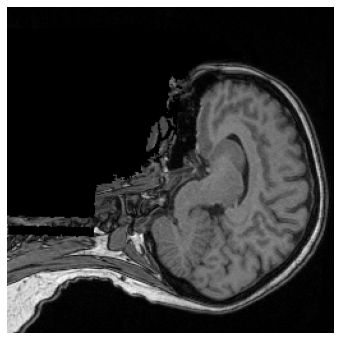

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6)) 
plt.imshow(datos_cor, cmap = 'gray')
plt.axis('off')
name_save = 'corte_ana_k_'+ str(cor_sel)
plt.savefig(opj(path_png,name_save))
plt.show()

Estamos observando una imagen sagital, la cual corresponde al plano YZ en el sistema de coordenadas mundial. La adquisición de la imagen anatómica se realizó en el sistema de coordenadas anatómico 'PSR', por lo que los datos se almacenaron de la siguiente manera


    datos_img[P,S,R] = datos[Y,Z,X]

Por lo tanto, si seleccionamos cortes en la dirección *k* en el sistema de coordenadas voxel de una imagen con sistema de coordenadas anatómico 'PSR', obtendremos los cortes sagitales del sujeto.

En este sistema 'PSR', si queremos visualizar los cortes coronales que corresponde al plano XZ en el sistema de coordenadas mundial, debe seleccionarse en la dirección *i* en el sistema de coordenadas voxel, mientras que los cortes axiales que corresponde al plano XY en el sistema de coordenadas mundial, debemos seleccionar en la dirección *j* en el sistema de coordenadas voxel.

#### Guardar el corte seleccionado

In [14]:
name_save = 'corte_ana_k_'+ str(cor_sel) + '.nii'

nib.save(cor, opj(path_output,name_save))

'''
Verificamos si se guardo correctamente, cargando de nuevo el corte y visualizando su forma
'''

img_again = nib.load(opj(path_output,name_save))
img_again.shape

(256, 256, 1)

&nbsp;
### Corte de slices en imagen fisiológica (4D)

#### Cortar los primeros X volumenes de la IF


In [15]:
# Indique el numero de volumenes que desea eliminar
num_vol = 10

# De la matriz form_ana, form_ana[2] me indica el slice
corte_img_fis = img_fis.slicer[...,num_vol:form_fis[3]]

# Comparamos con la forma orignal de img_ana
print('\n-----------------------------------------------------------------------------\n')
print('Forma de la matriz_fis:', '\n', form_fis, '------>', 'original')
print('\n-----------------------------------------------------------------------------\n')
print('Forma del segmento matriz_fis:', '\n', corte_img_fis.shape, '------>', 
      'se recortaron los primeros', num_vol,'volumes de la imagen')
print('\n-----------------------------------------------------------------------------\n')


-----------------------------------------------------------------------------

Forma de la matriz_fis: 
 (64, 64, 36, 200) ------> original

-----------------------------------------------------------------------------

Forma del segmento matriz_fis: 
 (64, 64, 36, 190) ------> se recortaron los primeros 10 volumes de la imagen

-----------------------------------------------------------------------------



#### Cortar los primeros X y ultimos X volumenes de IF

In [16]:
# Indique el numero de slices que desea eliminar al inicio y final de la imagenn
num_vol = 13
tot_vol = 2*num_vol # total de slices recortados

corte_img_fis = img_fis.slicer[...,num_vol:-num_vol]

# Comparamos con la forma orignal de img_ana
print('\n------------------------------------------------------------------------------\n')
print('Forma de la matriz_fis:', '\n', form_fis, '------>', 'original')
print('\n------------------------------------------------------------------------------\n')
print('Forma del segmento matriz_fis:', '\n', corte_img_fis.shape, '------>', 
      tot_vol,'volumenes recortados:', num_vol,'al inicio y', num_vol, 'al final')
print('\n------------------------------------------------------------------------------\n')


------------------------------------------------------------------------------

Forma de la matriz_fis: 
 (64, 64, 36, 200) ------> original

------------------------------------------------------------------------------

Forma del segmento matriz_fis: 
 (64, 64, 36, 174) ------> 26 volumenes recortados: 13 al inicio y 13 al final

------------------------------------------------------------------------------



#### Seleccion de los primeros X volumenes

In [17]:
v_fir = 9  # inidicar el numero de los primeros volumenes que desea seleecionar

v = img_fis.slicer[..., :v_fir]
print('\n---------------------------------------\n')
print(v.shape, '--->', 'forma del volumen',)
print('\n---------------------------------------\n')


---------------------------------------

(64, 64, 36, 9) ---> forma del volumen

---------------------------------------



#### Utilizar un paso entero al cortar

In [18]:
pas = 2
vol_pas = img_fis.slicer[::pas, ::pas, ::pas]

print('\n---------------------------------------\n')
print(vol_pas.shape, '--->', 'forma del volumen')
print('\n---------------------------------------\n')


---------------------------------------

(32, 32, 18, 200) ---> forma del volumen

---------------------------------------



#### Seleccion de un volumen para extraer un corte

In [19]:
vol_sel = 4 # indicar el numero del volumen a sleccionar

vol = img_fis.slicer[..., vol_sel]
print(vol.shape, '--->', 'forma del volumen', vol_sel)

#datos_vol = vol.get_fdata()
#print(datos_vol.size)

(64, 64, 36) ---> forma del volumen 4


#### Seleccionar un corte en la dirección *k* del sistema de coordenas voxels

Le indicamos al usuario que ingrese el corte que desea seleccionar

In [20]:
# Le indicamos al usuario que ingrese el corte que desea seleccionar

while True:
    print('\n-----------------------------------------\n')
    print('La imagen posee', form_fis[2], 'cortes/slices', '\n',
         'ingrese un valor entre 0 y', form_fis[2])
    print('\n-----------------------------------------\n')
    cor_sel =  input('Ingrese el corte que desea seleccionar:')
    ver_num = cor_sel.isnumeric()
    if ver_num == True:
        print(" El slice seleccionado es el:", cor_sel)
        print('\n-----------------------------------------\n')      
        break
    else:
        print(" \nERROR. Se debe ingresar un numero natural")

#corvetimos a int
cor_sel = int(cor_sel)


-----------------------------------------

La imagen posee 36 cortes/slices 
 ingrese un valor entre 0 y 36

-----------------------------------------

Ingrese el corte que desea seleccionar:20
 El slice seleccionado es el: 20

-----------------------------------------



Extraemos el corte seleccionado

In [21]:
if cor_sel == 0:
    cor_sel = -(form_fis[2]-1)
    cor = vol.slicer[..., 0:cor_sel]
    print('\n-------------------------------------\n')
    print(cor.shape, '--->', 'forma del corte 0')
    print('\n-------------------------------------\n')
elif cor_sel == form_fis[2]:
    cor = vol.slicer[..., form_fis[2]-1:form_fis[2]]
    print('\n-------------------------------------\n')
    print(cor.shape, '--->', 'forma del corte', cor_sel)
    print('\n-------------------------------------\n')
else:  
    cor = vol.slicer[..., cor_sel:cor_sel+1]
    print('\n-------------------------------------\n')
    print(cor.shape, '--->', 'forma del corte', cor_sel)
    print('\n-------------------------------------\n')


-------------------------------------

(64, 64, 1) ---> forma del corte 20

-------------------------------------



#### Visualizar el corte seleccionado

Cargamos los datos del corte seleccionado (*cor*)

In [22]:
datos_cor = cor.get_fdata()

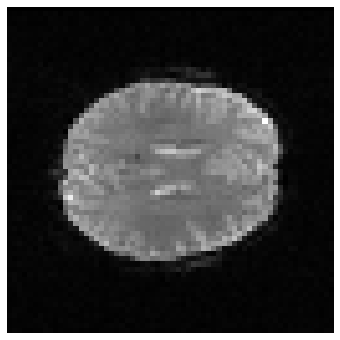

In [23]:
plt.figure(figsize=(6, 6)) 
plt.imshow(datos_cor, cmap = 'gray')
plt.axis('off')
name_save = 'corte_fis_k_'+ str(cor_sel)
plt.savefig(opj(path_png,name_save))
plt.show()

Estamos observando una imagen axial, la cual corresponde al plano XY en el sistema de coordenadas mundial. La adquisición de la imagen fisiológica se realizó en el sistema de coordenadas anatómico 'LAS', por lo que los datos se almacenaron de la siguiente manera


    datos_img[L,A,S] = datos[X,Y,Z]

Por lo tanto, si seleccionamos cortes en la dirección *k* en el sistema de coordenadas voxel de una imagen con sistema de coordenadas anatómico 'LAS', obtendremos los cortes axiales del sujeto.

En este sistema 'LAS', si queremos visualizar los cortes sagitales que corresponde al plano YZ en el sistema de coordenadas mundial, debemos seleccionar en la dirección *i* en el sistema de coordenadas voxel, mientras que los cortes coronales que corresponde al plano XZ en el sistema de coordenadas mundial, debe seleccionarse en la dirección *j* en el sistema de coordenadas voxel.

#### Guardar el corte seleccionado

In [24]:
name_save = 'corte_fis_k_'+ str(cor_sel) + '.nii'

nib.save(cor, opj(path_output,name_save))

'''
Verificamos si se guardo correctamente, cargando de nuevo el corte y visualizando su forma
'''

img_again = nib.load(opj(path_output,name_save))

print('\n-------------------------------------\n')
print(img_again.shape, '--->', 'forma del corte')
print('\n-------------------------------------\n')


-------------------------------------

(64, 64, 1) ---> forma del corte

-------------------------------------



## Creación de funcion 'visual_cortes_ana'

La siguiente función genera la visualización de los cortes anatómico de varias imágenes (hasta cuatro), requiriendo como inputs:

- img: Diccionario con las imágenes nifti
- vol: Volumen donde se desea visualizar los cortes anatómicos
- voxel: Posición i,j,k del voxel sobre el cual se proyectarán los cortes

Obteniendo como output los diferentes cortes anatómicos sobre un voxel de las imágenes ingresadas en 'img'.

El input 'vox' es la posición i,j,k en el sistema de coordenadas voxel y sobre el cual se extraerán los tres planos anatómicos (sagital, coronal y axial) según el sistema de referencia anatómico con que se adquirieron las imágenes. En la imagen se ilustra como en un volumen de 5x5x5 vóxeles, elegimos el voxel (3,4,2) para visualizar los cortes sobre dicho voxel.

![](imagenes/funcion_cortes_ana.png)

In [25]:
'''
Función para generar la visualización de los cortes anatómico de varias imágenes (hasta cuatro) 

Inputs:

- img: Diccionario con las imágenes nifti
- vol: Volumen donde se desea visualizar los cortes anatómicos
- voxel: Posición i,j,k del voxel sobre el cual se proyectarán los cortes

Outputs:
- plot de los diferentes cortes anatómicos sobre un voxel de las imágenes ingresadas en 'img'
'''

def visual_cortes_ana(img, vol, voxel):
    import nibabel as nib
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
   
    # Creamos una lista con las claves del diccionario ingresado
    lista_img = list(img.keys())

    corte_sag = {}
    corte_cor = {}
    corte_axi = {}
    datos_img = {}
    x_cor = {}
    y_cor = {}
    z_cor = {}
    nomb_ori={}
    for i, ima in enumerate(lista_img):
        # Orientacion de la imágen
        orientacion = nib.orientations.aff2axcodes(img[ima].affine)
        # creamos un nombre para la grafica
        a = ','.join(orientacion)
        nomb_ori[ima] = '('+ a +')'
        
        #cargamos datos de la imagen
        datos_img[ima] = img[ima].get_fdata()
        ta = len(datos_img[ima].shape)
        if ta == 4:
            datos_img[ima] = datos_img[ima][...,vol]
        else:
            datos_img[ima] = datos_img[ima][...]

        #se extraen valores x, y, z del voxel ingresado y cortes segun posición anatómica
        for j in range(len(orientacion)):
            ori = str(orientacion[j])

            if  ori == 'L'or ori == 'R':
                x_cor[ima] = voxel[j]
                
                # corte segun posición anatómica
                if j == 0:
                    corte_sag[ima] = datos_img[ima][x_cor[ima],:,:]
                elif j == 1:
                    corte_sag[ima] = datos_img[ima][:,x_cor[ima],:]
                elif j == 2:
                    corte_sag[ima] = datos_img[ima][:,:,x_cor[ima]]

            elif ori == 'A' or ori == 'P':
                y_cor[ima] = voxel[j]
                
                # corte segun posición anatómica
                if j == 0:
                    corte_cor[ima] = datos_img[ima][y_cor[ima],:,:]
                elif j == 1:
                    corte_cor[ima] = datos_img[ima][:,y_cor[ima],:]
                elif j == 2:
                    corte_cor[ima] = datos_img[ima][:,:,y_cor[ima]]

            elif ori == 'I'or ori == 'S':
                z_cor[ima] = voxel[j]
                
                # corte segun posición anatómica
                if j == 0:
                    corte_axi[ima] = datos_img[ima][z_cor[ima],:,:]
                elif j == 1:
                    corte_axi[ima] = datos_img[ima][:,z_cor[ima],:]
                elif j == 2:
                    corte_axi[ima] = datos_img[ima][:,:,z_cor[ima]]
    
    # Definimos estilo de letra para la grafica
    font1 = {'fontsize':18, 'fontweight':'bold', 'color':'tab:blue'}
    font2  = {'fontsize':18, 'fontweight':'bold', 'color':'tab:red'}
    
    if (len(lista_img))==1:
        #Graficamos
        nom = lista_img[0] + '\n' + nomb_ori[lista_img[0]]

        fig, axes = plt.subplots(1,3, figsize=(15, 15))
        fig.suptitle(nom, fontweight ="bold", fontsize = 22, color = 'tab:blue')
        axes[0].imshow(corte_sag[ima], cmap = 'gray')
        axes[1].imshow(corte_cor[ima], cmap = 'gray')
        axes[2].imshow(corte_axi[ima], cmap = 'gray')
        for i in range(3):
            axes[i].axis('off')

        # Titulos de las graficas
        titulo =['Corte Sagital: '+ str(x_cor[ima]) + '\n', 
                 'Corte Coronal: '+ str(y_cor[ima]) + '\n',
                 'Corte Axial: '+ str(z_cor[ima]) + '\n']

        for i, title in enumerate(titulo):
            axes[i].set_title(title, fontdict=font2)

        plt.subplots_adjust(#left=0.5,
                        #bottom=0.5, 
                        #right=0.7,
                        hspace=0.3,
                        top=1.26)
        fig.patch.set_facecolor('xkcd:white')
        plt.show()
    
    else:
        # Graficamos
        fig, axes = plt.subplots(3, len(lista_img),figsize=(20, 20))
        for i, im in enumerate(lista_img):
            axes[0,i].imshow(corte_sag[im], cmap = 'gray')
            axes[1,i].imshow(corte_cor[im], cmap = 'gray')
            axes[2,i].imshow(corte_axi[im], cmap = 'gray')

        
            # Identificamos los cortes
            titulo =['Corte Sagital: '+ str(x_cor[im]) + '\n', 
                     'Corte Coronal: '+ str(y_cor[im]) + '\n',
                     'Corte Axial: '+ str(z_cor[im]) + '\n']

            for j, title in enumerate(titulo):
                axes[j,i].xaxis.set_label_position('top')
                axes[j,i].set_xlabel(title, fontdict=font2)
            

        # Titulos que que identifica la imagen y la orientacion
        for i,im in enumerate(lista_img):
            axes[0,i].set_title((im+'\n'+nomb_ori[im]+'\n'), 
                                fontdict=font1)
        
        #for j in range(3):
            #for i in range(2):
                #axes[j,i].axis('off')

    
        plt.subplots_adjust(#left=0.5,
                            #bottom=0.5, 
                            #right=0.7,        
                            #hspace=0.3,
                            top=0.91)
    plt.show()
    
    # cargamos imagen de referencia de los cortes anatomicos
    img_cor_sag = mpimg.imread(opj(path_ref,'corte_sagital_ref.png'))
    img_cor_cor = mpimg.imread(opj(path_ref,'corte_coronal_ref.png'))
    img_cor_axi = mpimg.imread(opj(path_ref,'corte_axial_ref.png'))

    img_cor = [img_cor_sag,img_cor_cor,img_cor_axi]

    fig, axes = plt.subplots(1,3, figsize=(2,2))
    for i,imco in enumerate(img_cor):
        axes[i].imshow(img_cor[i])
        axes[i].axis('off')

    # para cambiar el espacio entre las subtramas de Matplotlib
    plt.subplots_adjust(left=0, 
                        bottom=0.1,  
                        right=7,  
                        top=0.9,  
                        wspace=1,  
                        hspace=0.4)
    #fig.tight_layout()
    fig.patch.set_facecolor('xkcd:white')
    plt.plot()

### Ejecutamos función para cada imagen

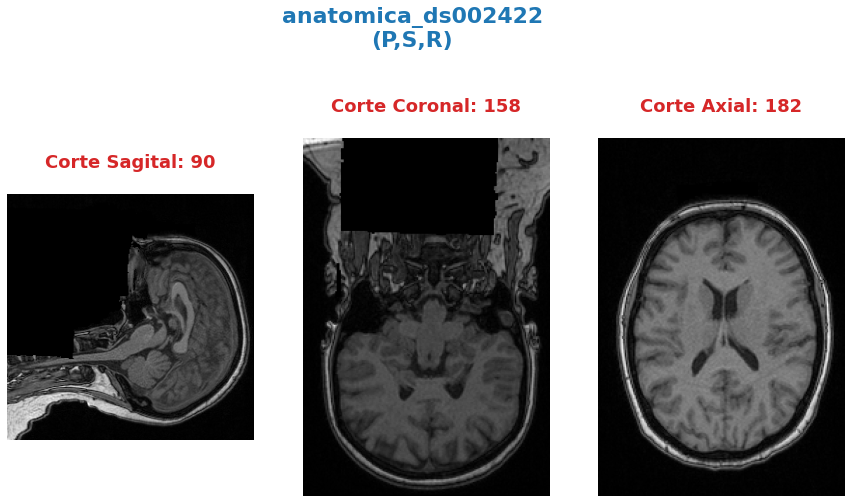

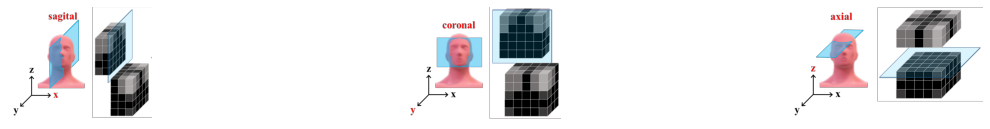

In [26]:
img_pru = {'anatomica_ds002422': img_ana}

visual_cortes_ana(img= img_pru,
                 vol= 0,
                 voxel=(158,182,90))

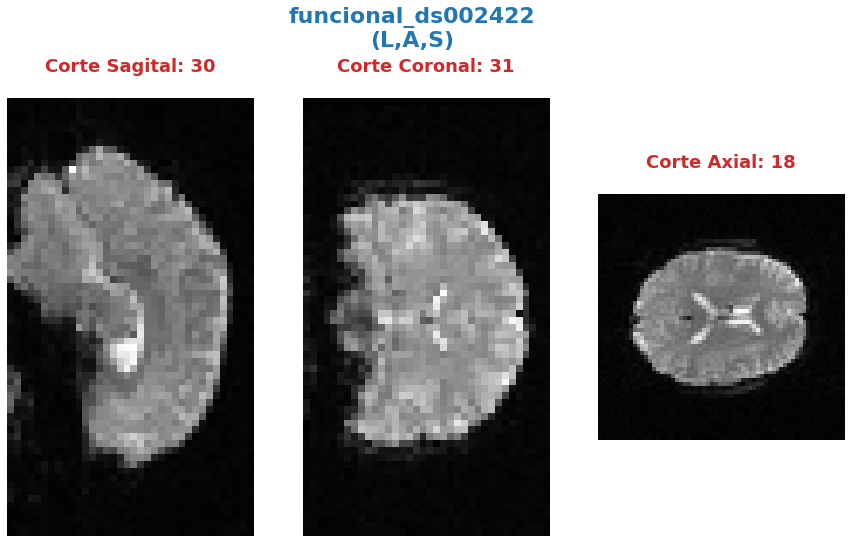

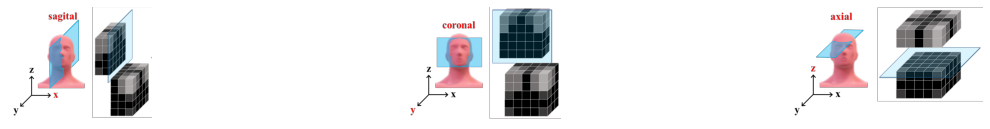

In [27]:
img_pru = {'funcional_ds002422': img_fis}
visual_cortes_ana(img= img_pru,
                 vol= 0,
                 voxel=(30,31,18))

### Ejecutamos función con ambas imágenes 

Una alternativa de ejecutar la función con ambas imágenes, erepresentando el resultado de tanto de la imagen anatomica y funcional en una sola imagen. Para ello creamos un diccionario con las imagenes que seran input de la función.

In [28]:
img_pru = {'anatomica': img_ana, 'funcional': img_fis}

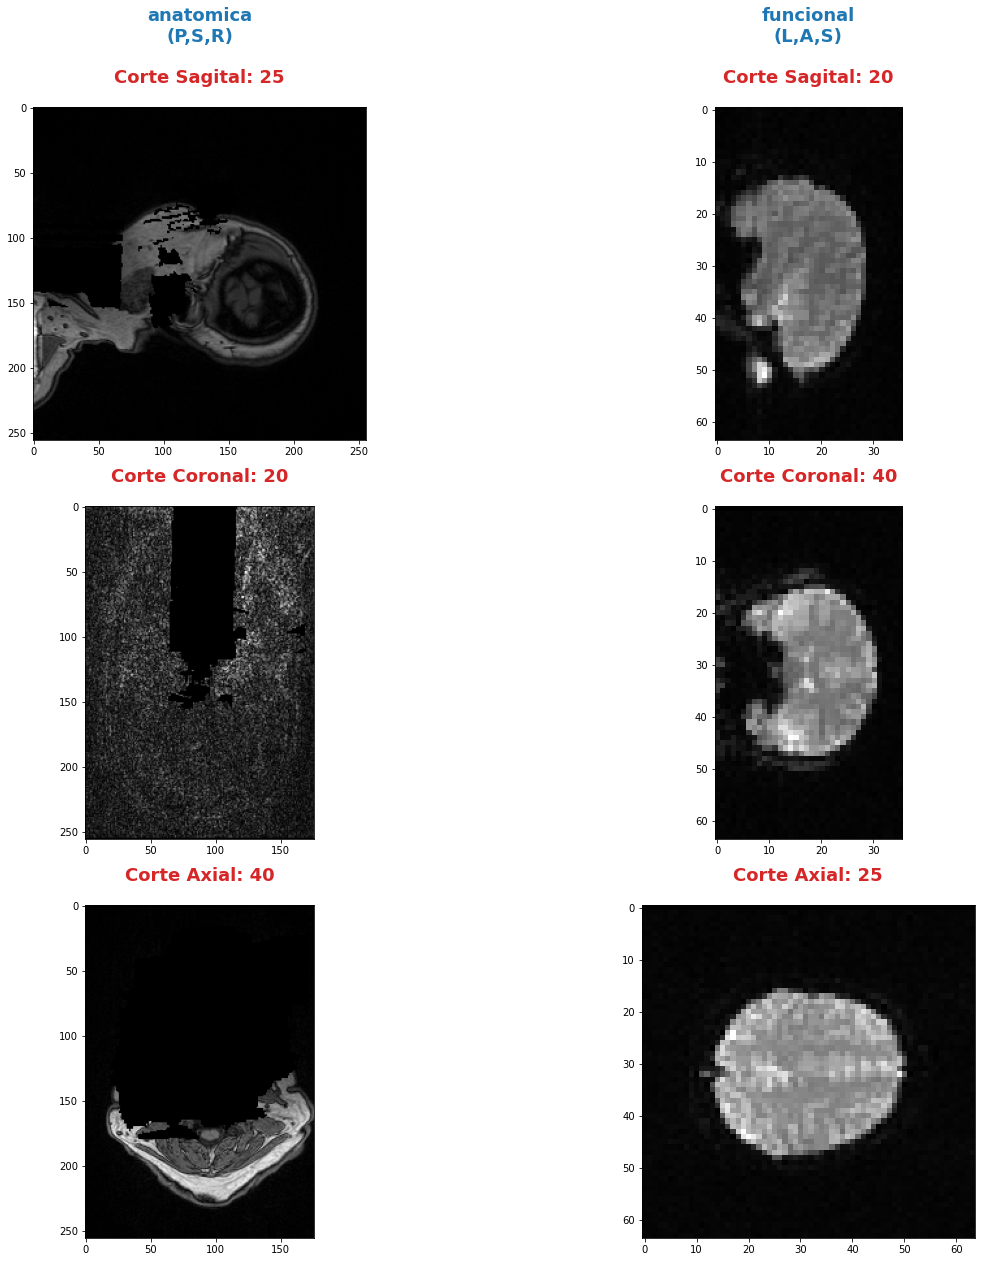

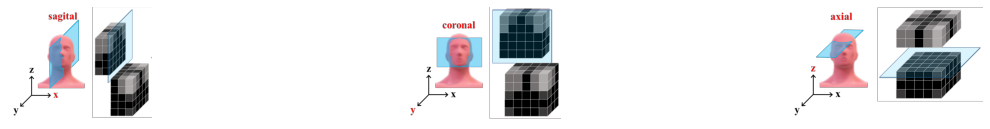

In [29]:
visual_cortes_ana(img= img_pru,
                 vol= 0,
                 voxel=(20,40,25))

## Tiempo de ejecución

In [30]:
fin = time.time()
end = time.process_time()
tiempo = fin - inicio
tiempo2 = end - start

print('--------------------------------------')
print('tiempo de ejecución\n\n', round(tiempo,3), 'seg\n', round(tiempo/60,3), 'min')     
print('--------------------------------------')
print('tiempo de ejecución del sistema y CPU\n\n', round(tiempo2,3), 'seg\n', round(tiempo2/60,3), 'min')
print('--------------------------------------')

--------------------------------------
tiempo de ejecución

 21.161 seg
 0.353 min
--------------------------------------
tiempo de ejecución del sistema y CPU

 9.044 seg
 0.151 min
--------------------------------------


## Fin